# **Deep Learning Image Classification with CNN**

**Objective**

The objective of this code is to classify images from the CIFAR-10 dataset using a pre-trained DenseNet121 model. The code includes steps for loading the dataset, preprocessing the data, augmenting the training data, defining the model architecture, training the model, evaluating its performance, and visualizing the results.

**About the Data**

The dataset for this task is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. 

The ten classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. 

Each image is 32x32 pixels in size with 3 color channels, RGB.

The dataset has been split in the following manner: 50k images for training, 10k images for testing

Reference: https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

In [3]:
# Imports the necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
# Loads the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Data Preprocessing
X_train = X_train / 255.0  # Normalizes pixel values to [0, 1] - this helps the model improve its ability to learn efficiently
X_test = X_test / 255.0
y_train_cat = to_categorical(y_train, 10)  # One-hot encoding for labels - each label corresponds to a vector with 1 at the index of the class and 0 elsewhere.
y_test_cat = to_categorical(y_test, 10)


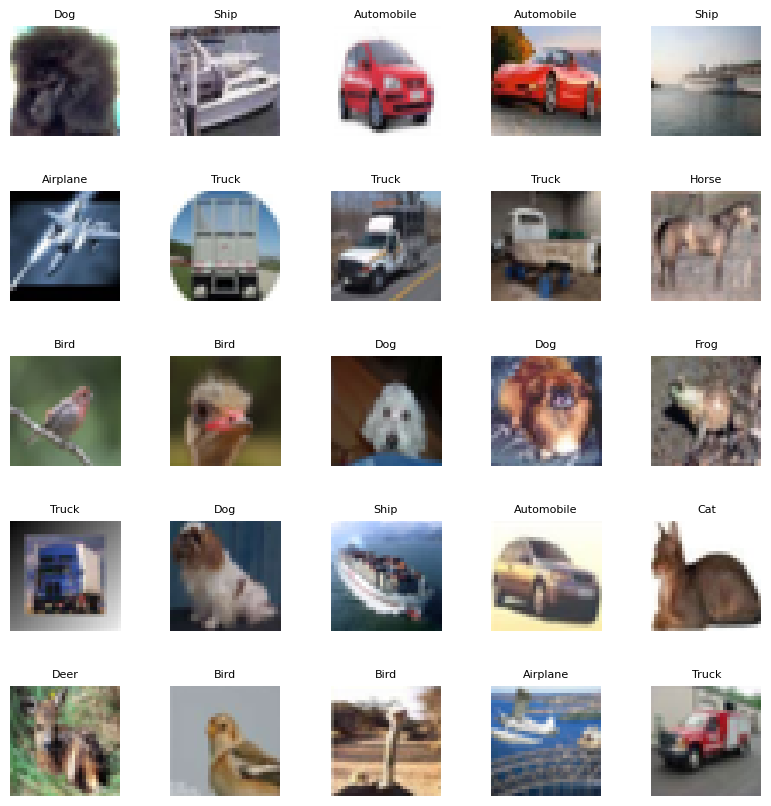

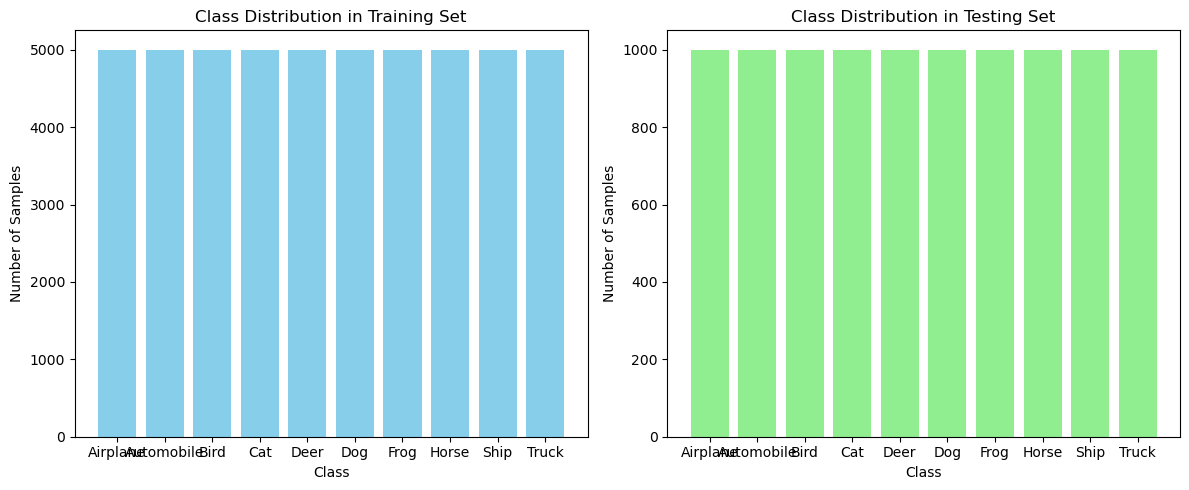

In [7]:
# Visualization: Random Samples from Training Set
# This helps confirm the dataset's integrity and diversity
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
          'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(25):  # Displays 25 random images
    idx = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[idx])
    axes[i].set_title(labels[y_train[idx][0]], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

# Visualization: Class Distribution in Training and Testing Sets
# Helps to confirm that the dataset is balanced across the 10 classes
train_counts = np.unique(y_train, return_counts=True)[1]
test_counts = np.unique(y_test, return_counts=True)[1]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, train_counts, color='skyblue')
plt.title('Class Distribution in Training Set')
plt.ylabel('Number of Samples')
plt.xlabel('Class')

plt.subplot(1, 2, 2)
plt.bar(labels, test_counts, color='lightgreen')
plt.title('Class Distribution in Testing Set')
plt.ylabel('Number of Samples')
plt.xlabel('Class')

plt.tight_layout()
plt.show()

In [9]:
# Data Augmentation
# Uses ImageDataGenerator to improve the model's generalization.
# This includes horizontal flipping and width/height shifts.
# These transformations simulate real-world variations in the dataset.
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Define DenseNet121 Model
# DenseNet121 serves as the base model.
# For CIFAR-10, the default classification layer has been excluded and a pooling layer has been added.
# The global average pooling layer helps to reduce the feature maps to a single vector.
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(32, 32, 3), pooling='avg')
model = Sequential([
    base_model,
    Dense(10, activation='softmax')  # The output layer has 10 neurons, one per class, and has a softmax activation to output probabilities.
])

# Model Training
# The model uses categorical cross-entropy, an adam optimizer (has an adaptive learning rate) and the accuracy metric to track the % of correct predictions.
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Model is trained for 20 epochs, with data augmentation applied during the training.
history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=32),
    validation_data=(X_test, y_test_cat),
    epochs=20
)

# Saves the Model
# The trained model has been saved in the keras format (versus h5) to ensure compatibility with future versions of TensorFlow.
model.save('densenet_cifar10.keras')  # Save in the recommended .keras format

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 288s 172ms/step - accuracy: 0.4486 - loss: 1.6219 - val_accuracy: 0.4642 - val_loss: 1.6542
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 372s 238ms/step - accuracy: 0.5762 - loss: 1.2448 - val_accuracy: 0.5240 - val_loss: 6.6582
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 336s 215ms/step - accuracy: 0.6349 - loss: 1.0760 - val_accuracy: 0.5031 - val_loss: 2.1518
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 340s 218ms/step - accuracy: 0.6817 - loss: 0.9320 - val_accuracy: 0.6785 - val_loss: 3.1231
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 331s 212ms/step - accuracy: 0.7334 - loss: 0.7748 - val_accuracy: 0.7669 - val_loss: 0.6808
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 329s 211ms/step - accuracy: 0.7554 - loss: 0.7353 - val_accuracy: 0.7100 - val_loss: 1.3602
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 327s 209ms/step - accuracy: 0.7017 - loss: 0.9077 - val_accuracy: 0.6668 - val_loss: 1.4545
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 313s 200ms/step - accuracy: 0.7

KeyboardInterrupt: 

In [11]:
# Evaluates the model looking at its test accuracy, generating a classification report, and a confusion matrix.
# Accuracy - % of correct predictions
evaluation = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {evaluation[1]:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7862 - loss: 0.6283
Test Accuracy: 0.7888


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.80      0.82      0.81      1000
  Automobile       0.85      0.91      0.88      1000
        Bird       0.84      0.65      0.73      1000
         Cat       0.71      0.52      0.60      1000
        Deer       0.85      0.69      0.76      1000
         Dog       0.66      0.82      0.73      1000
        Frog       0.77      0.91      0.83      1000
       Horse       0.81      0.85      0.83      1000
        Ship       0.88      0.83      0.85      1000
       Truck       0.75      0.90      0.82      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



<Figure size 1000x1000 with 0 Axes>

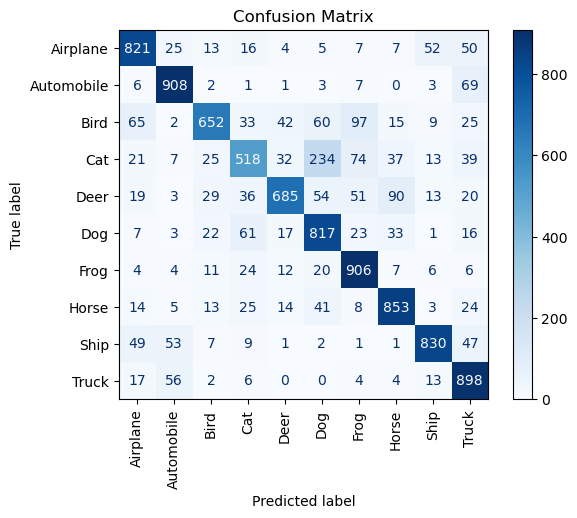

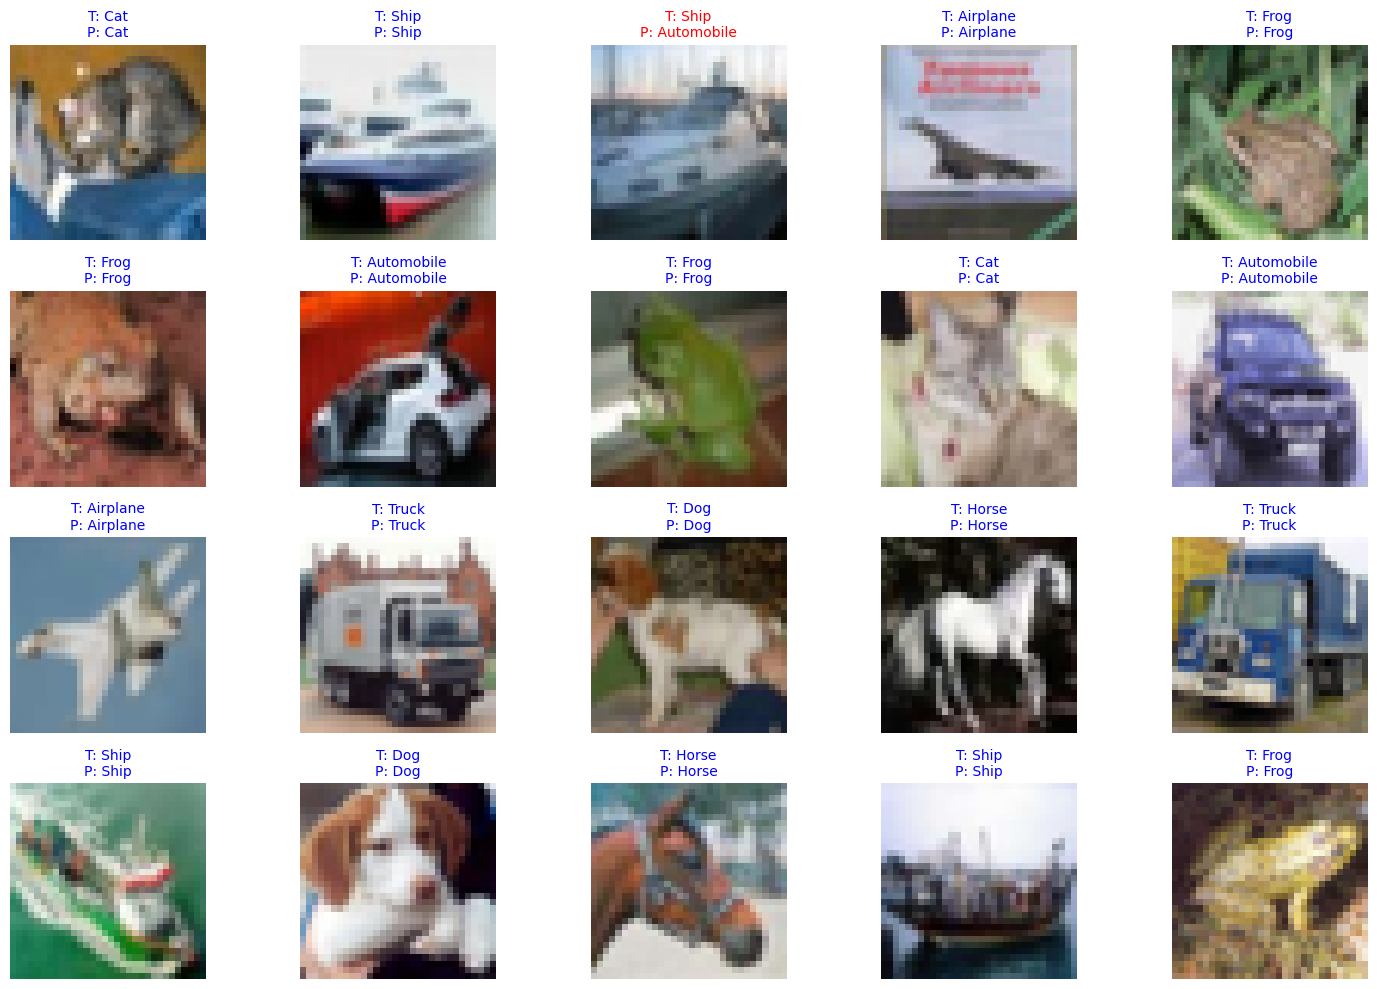

In [13]:
# Predictions and Classification Report
# Classification report share precision, recall and F1-score for each class
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = y_test.flatten()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion Matrix
# Visualizes the model's performance across classes
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# Visualization: Predictions
# Correct predictions are marked in blue, incorrect ones in red.
num_rows, num_cols = 4, 5
plt.figure(figsize=(15, 10))

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[i])
    true_label = labels[y_true[i]]
    pred_label = labels[y_pred[i]]
    color = 'blue' if true_label == pred_label else 'red'
    plt.title(f"T: {true_label}\nP: {pred_label}", color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Possible Improvements to the Model**

There are several possibilities that could be explored for further enhancement of the model shared here.

- The ROC-AUC metric could be applied, to help in understanding how well the model distinguishes the classes (beyond precision and recall).

- Fine-tuning further DenseNet121: selectively unfreesing the top layers of the pre-trained model and fine-tune them on CIFAR-10. This should allow the model to adapt its high level features to the dataset at the same time it leverages pre-trained lower level features.

- Introduce more diversity within the augmentations (for example, roation, zoom or cutout)\

- Applying label smoothing to soften the one-hot encoded labels may help prevent overfitting by reducing the confidence of the level's predictions

- Dense layers or convolutional filters (L2 regularization)

- Upscaling the resolution of CIFAR-10 images

/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 366 variables whereas the saved optimizer has 730 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


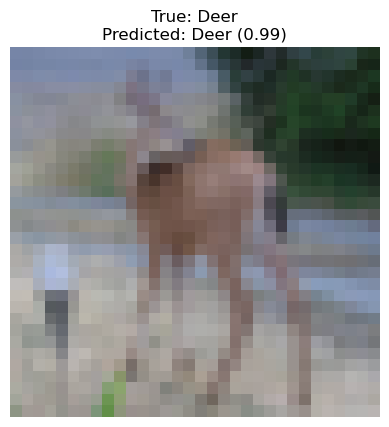

True Label: Deer
Predicted Label: Deer
Confidence: 0.99


In [21]:
# **Additional Codes Developed**

# Tests on one image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset (for testing purposes)
(_, _), (X_test, y_test) = cifar10.load_data()

# Loads the trained model
model = load_model('/Users/sylviaperez-montero/Desktop/project-1-deep-learning-image-classification-with-cnn-main/cnn_20_epochs.keras')

# Defines CIFAR-10 class labels
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
          'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Selects a single image from the test set
image_index = 100  # Change index to test different images
image = X_test[image_index]
true_label = y_test[image_index][0]

# Preprocesses the image
preprocessed_image = image / 255.0  # Normalize pixel values to [0, 1]
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)  # Add batch dimension

# Makes a prediction
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions, axis=1)[0]
confidence = np.max(predictions)

# Displays the image and results
plt.imshow(image)
plt.axis('off')
plt.title(f"True: {labels[true_label]}\nPredicted: {labels[predicted_class]} ({confidence:.2f})")
plt.show()

print(f"True Label: {labels[true_label]}")
print(f"Predicted Label: {labels[predicted_class]}")
print(f"Confidence: {confidence:.2f}")

In [ ]:
# Randomly selects 10 images, as required by the project.

# Imports the necessary libraries
import os
import numpy as np
from tensorflow.keras.datasets import cifar10
from PIL import Image

# Loads CIFAR-10 dataset
(X_train, y_train), (_, _) = cifar10.load_data()

# Creates a folder named 'images' in the current directory
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

# Selects 10 random indices
random_indices = np.random.choice(len(X_train), 10, replace=False)

# Saves the selected images
for i, idx in enumerate(random_indices):
    # Get the image
    img = X_train[idx]
    
    # Converts the image array to a PIL image
    pil_img = Image.fromarray(img)
    
    # Saves the image with a sequential filename (e.g., image_1.png, image_2.png, etc.)
    filename = os.path.join(output_dir, f"image_{i+1}.png")
    pil_img.save(filename)

    print(f"Saved: {filename}")

print(f"All 10 images saved in the '{output_dir}' directory.")